# Fit & predict for regression

0.9569566641435086


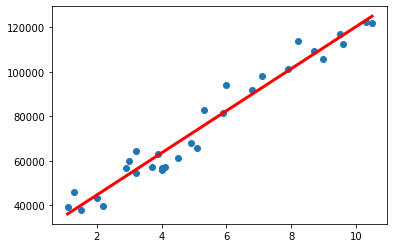

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# import dataset
df = pd.read_csv('../data/Salary - Experience data/Salary_Data.csv')

# get X,y data and target
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

#plot the scatter graph
plt.scatter(X,y)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
pred_space = np.linspace(min(X),max(X))

# Fit the model to the data
reg.fit(X,y)

# Compute predictions over the prediction space
y_pred = reg.predict(pred_space)

# print score
print(reg.score(X,y))

# Plot regression line
plt.plot(pred_space, y_pred, color = 'red', linewidth = 3)

# Train/test split for regression

In [38]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('../data/Salary - Experience data/Salary_Data.csv')

# get X,y data and target
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE (Root Mean Squared Error)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# see y_pred and y_test in the table to understand the RMSE
df2 =pd.DataFrame({'y_pred':y_pred.flatten(), 'y_test':y_test.flatten()}, index = range(len(y_pred)))
df2.head(20)

R^2: 0.9414466227178214
Root Mean Squared Error: 6146.92300799458


,y_pred,y_test
0,115573.622884,112635.0
1,71679.938782,67938.0
2,102498.908470,113812.0
3,75415.571471,83088.0
4,55803.499851,64445.0
5,60473.040713,57189.0
6,122110.980090,122391.0
7,107168.449332,109431.0
8,63274.765230,56957.0


# 5-fold cross-validation

In [45]:
#import the necessary modules
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 3-fold cross-validation scores
cv_scores = cross_val_score(reg,X,y,cv = 3)
# print and calculate the average
print(cv_scores)
print('Average of 5-fold cross validation scores: {}'.format(np.mean(cv_scores)))

[0.42772573 0.63293326 0.71542639]
Average of 5-fold cross validation scores: 0.592028458771364
